# Importing the necessary libraries 

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as pv
import warnings
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2,f_oneway
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.preprocessing import LabelEncoder,StandardScaler

warnings.filterwarnings('ignore')

enc = LabelEncoder()

%matplotlib inline

# Importing the Dataset and setting the index column as EmpNumber

In [7]:
data = pd.read_excel('INX_Future_Inc_Employee_Performance_CDS_Project2_Data_V1.8.xls',index_col=0)

# RAW DATA

In [8]:
data.head(5)

,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,...,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
EmpNumber,,,,,,,,,,,,,,,,,,,,,
E1001000,32,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,10,3,4,...,4,10,2,2,10,7,0,8,No,3
E1001006,47,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,14,4,4,...,4,20,2,3,7,7,1,7,No,3
E1001007,40,Male,Life Sciences,Married,Sales,Sales Executive,Travel_Frequently,5,4,4,...,3,20,2,3,18,13,1,12,No,4
E1001009,41,Male,Human Resources,Divorced,Human Resources,Manager,Travel_Rarely,10,4,2,...,2,23,2,2,21,6,12,6,No,3
E1001010,60,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,16,4,1,...,4,10,1,3,2,2,2,2,No,3


# Checking for Null Values

<AxesSubplot:ylabel='EmpNumber'>

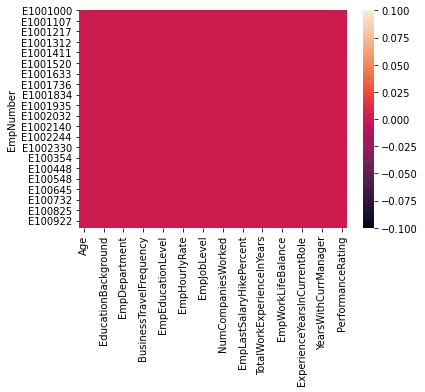

In [9]:
sns.heatmap(data.isnull())

We can observe from the above heatmap that there are no null or missing values




# Checking for different data types

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1200 entries, E1001000 to E100998
Data columns (total 27 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   Age                           1200 non-null   int64 
 1   Gender                        1200 non-null   object
 2   EducationBackground           1200 non-null   object
 3   MaritalStatus                 1200 non-null   object
 4   EmpDepartment                 1200 non-null   object
 5   EmpJobRole                    1200 non-null   object
 6   BusinessTravelFrequency       1200 non-null   object
 7   DistanceFromHome              1200 non-null   int64 
 8   EmpEducationLevel             1200 non-null   int64 
 9   EmpEnvironmentSatisfaction    1200 non-null   int64 
 10  EmpHourlyRate                 1200 non-null   int64 
 11  EmpJobInvolvement             1200 non-null   int64 
 12  EmpJobLevel                   1200 non-null   int64 
 13  EmpJobSatisfa

# EDA

## Investigating the distribution of Performace Rating

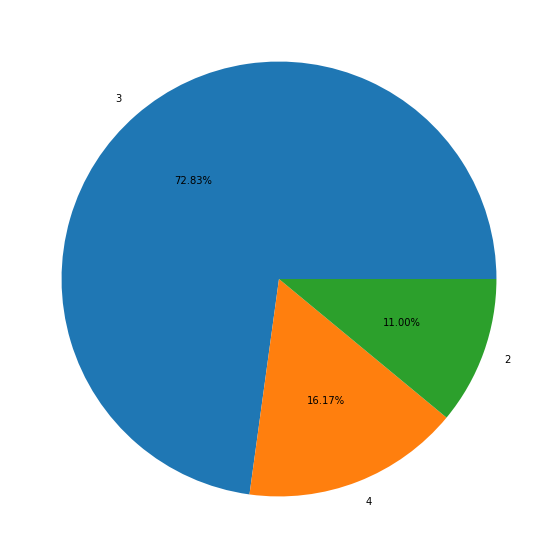

In [11]:
plt.figure(figsize=(10,10))
plt.pie(data.PerformanceRating.value_counts(),labels=data.PerformanceRating.unique(),autopct='%1.2f%%')
plt.show()

## Univariate Analysis

In [12]:
#Performing univariate analysis on EmpEnvironmentSatisfaction as it has the highest correlation with Employee Performance

In [13]:
data_goodper = data.loc[data['PerformanceRating']==2]
data_excellper = data.loc[data['PerformanceRating']==3]
data_outstanper = data.loc[data['PerformanceRating']==4]

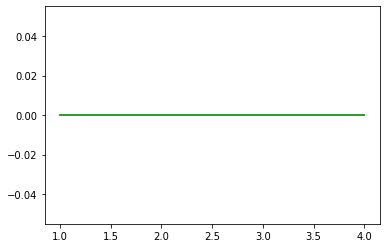

In [14]:
plt.plot(data_goodper['EmpEnvironmentSatisfaction'],np.zeros_like(data_goodper['EmpEnvironmentSatisfaction']))
plt.plot(data_excellper['EmpEnvironmentSatisfaction'],np.zeros_like(data_excellper['EmpEnvironmentSatisfaction']))
plt.plot(data_outstanper['EmpEnvironmentSatisfaction'],np.zeros_like(data_outstanper['EmpEnvironmentSatisfaction']))
plt.show()

## We can clearly see that the points are not linearly seperable as there is no clear distinction between them

We can rule out using Logistic Regression as the points do not seem to be linearly seperable

## Bivariate Analysis

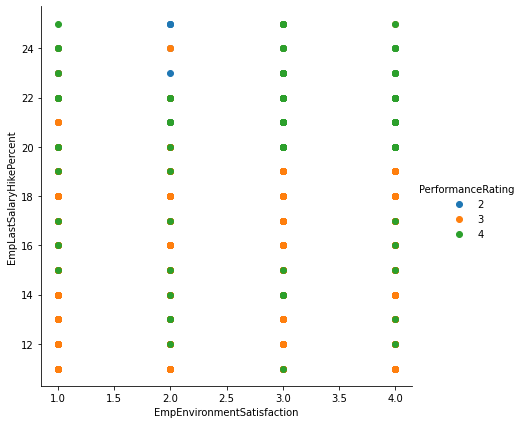

In [15]:
sns.FacetGrid(data,hue='PerformanceRating',height=6).map(plt.scatter,'EmpEnvironmentSatisfaction','EmpLastSalaryHikePercent').add_legend()

We can clearly see that even though the points are seperable,there is no clear distinction between performance rating

# DATA PRE-PROCESSING

In [16]:
# Encoding all the ordinal columns and creating a dummy variable for them to see if there are any effects on Performance Rating
df = data.copy()
for i in [1,2,3,4,5,6,15,24]:
    df.iloc[:,i] = enc.fit_transform(df.iloc[:,i])

# Top Factors Affecting Employee Perfromance Rating

In Order to get the Top 3 Factors the follwing methods have been used to determine the Factors
1. Correlation Matrix
2. Univariate Selection
3. Feature Importance

### Correlation Matrix

In [17]:
df.corrwith(df.PerformanceRating).sort_values(ascending=False)

PerformanceRating               1.000000
EmpEnvironmentSatisfaction      0.395561
EmpLastSalaryHikePercent        0.333722
EmpWorkLifeBalance              0.124429
OverTime                        0.050206
MaritalStatus                   0.024172
NumCompaniesWorked              0.020980
EmpEducationLevel               0.020529
EducationBackground             0.005607
EmpJobSatisfaction              0.000606
Gender                         -0.001780
TrainingTimesLastYear          -0.005443
EmpJobInvolvement              -0.010539
EmpRelationshipSatisfaction    -0.019502
BusinessTravelFrequency        -0.031025
Age                            -0.040164
EmpHourlyRate                  -0.043116
DistanceFromHome               -0.046142
TotalWorkExperienceInYears     -0.068141
EmpJobLevel                    -0.076632
EmpJobRole                     -0.096209
ExperienceYearsAtThisCompany   -0.111645
YearsWithCurrManager           -0.122313
ExperienceYearsInCurrentRole   -0.147638
EmpDepartment   

### Univariate Selection


In [18]:
X = df.iloc[:,0:25]  #independent columns
y = df.iloc[:,26]    #target column i.e Performance Rating

In [19]:
#selecting best features
bestfeatures = SelectKBest(score_func=chi2, k=10)

fit = bestfeatures.fit(X,y)

In [20]:
#Storing the Obtained values in dataframes for visualization
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

In [21]:
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Feature','Score']  #naming the dataframe columns

In [22]:
print(featureScores.nlargest(10,'Score'))  #print 10 best features

                         Feature       Score
16      EmpLastSalaryHikePercent  297.136917
23       YearsSinceLastPromotion  238.004284
21  ExperienceYearsAtThisCompany  133.602068
22  ExperienceYearsInCurrentRole  120.860036
9     EmpEnvironmentSatisfaction  110.691319
24          YearsWithCurrManager   87.483471
4                  EmpDepartment   46.787010
18    TotalWorkExperienceInYears   41.593037
5                     EmpJobRole   35.896167
7               DistanceFromHome   18.650010


### Feature Importance

In [23]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X,y)

ExtraTreesClassifier()

In [24]:
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers

[0.02979799 0.01866989 0.02384862 0.02213873 0.04666587 0.03329033
 0.02202281 0.02751106 0.02626563 0.16226362 0.03155417 0.02408739
 0.02205045 0.02531348 0.02555388 0.01427034 0.15810841 0.02501383
 0.02557862 0.02508232 0.03221663 0.03157506 0.03987718 0.07407597
 0.03316772]


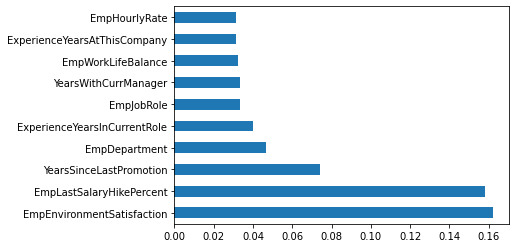

In [25]:
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

After Comparing the top 10 feature importance scores from all the Tests, it is observed that the top three factors affecting performance rating are as follows: 

 - EmpEnvironmentSatisfaction

 - EmpLastSalaryHikePercent 

 - YearsSinceLastPromotion

# Department -Wise Performance Rating

In [26]:
dataset_table = pd.crosstab(data['PerformanceRating'],data['EmpDepartment'])
print(dataset_table)

EmpDepartment      Data Science  Development  Finance  Human Resources  \
PerformanceRating                                                        
2                             1           13       15               10   
3                            17          304       30               38   
4                             2           44        4                6   

EmpDepartment      Research & Development  Sales  
PerformanceRating                                 
2                                      68     87  
3                                     234    251  
4                                      41     35  


<AxesSubplot:xlabel='EmpDepartment', ylabel='PerformanceRating'>

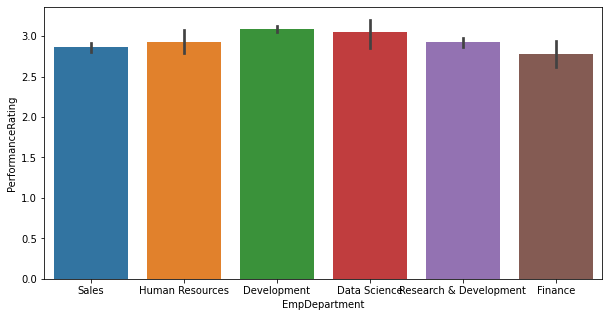

In [27]:
#HighLevel View of Data
df.groupby(by='EmpDepartment')['PerformanceRating'].mean()
fig = plt.figure(figsize=(10,5))
sns.barplot(x='EmpDepartment',y='PerformanceRating',data=data)

We cannot conclude with this data as there is variation between true values as the total number of records are not uniform in the data set

### In order to understand the true deparment-wise performance, we will need to investigate the breakup of the performances in each department

<Figure size 1440x1440 with 0 Axes>

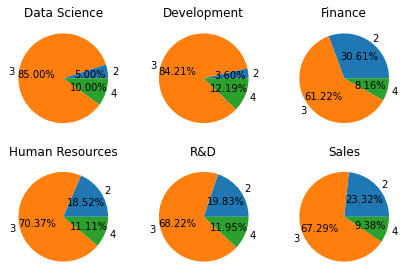

In [28]:
fig = plt.figure(figsize=(20,20))
fig,ax = plt.subplots(2,3)
ax[0,0].pie(dataset_table['Data Science'],autopct='%1.2f%%',labels=[2,3,4])
ax[0,0].set_title('Data Science')

ax[0,1].pie(dataset_table['Development'],autopct='%1.2f%%',labels=[2,3,4])
ax[0,1].set_title('Development')

ax[0,2].pie(dataset_table['Finance'],autopct='%1.2f%%',labels=[2,3,4])
ax[0,2].set_title('Finance')

ax[1,0].pie(dataset_table['Human Resources'],autopct='%1.2f%%',labels=[2,3,4])
ax[1,0].set_title('Human Resources')

ax[1,1].pie(dataset_table['Research & Development'],autopct='%1.2f%%',labels=[2,3,4])
ax[1,1].set_title('R&D')

ax[1,2].pie(dataset_table['Sales'],autopct='%1.2f%%',labels=[2,3,4])
ax[1,2].set_title('Sales')


plt.tight_layout()
plt.show()

### We can see from the above plot the top performing Departments are:
(Ranking  by comparing the Overall Percentage of Excellent and Outstanding Employees in a given Department)

1.Development 

2.Data Science 

3.Human Resources

### Investigating the relationship between Education Background and  Performance Rating

In [29]:
#Segregating the Perfomance Categories with respect to Education Background
dataset_table2 = pd.crosstab(data['PerformanceRating'],data['EducationBackground'])
print(dataset_table2)

EducationBackground  Human Resources  Life Sciences  Marketing  Medical  \
PerformanceRating                                                         
2                                  3             78         29       63   
3                                 16            357         94      281   
4                                  2             57         14       40   

EducationBackground  Other  Technical Degree  
PerformanceRating                             
2                        3                18  
3                       56                70  
4                        7                12  


<Figure size 1440x1440 with 0 Axes>

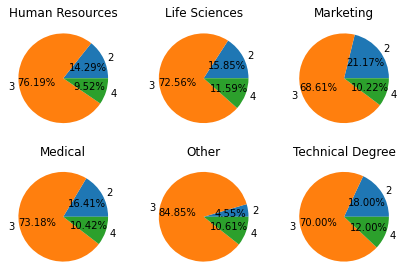

In [30]:
#Plotting the relationship
fig = plt.figure(figsize=(20,20))
fig,ax = plt.subplots(2,3)
ax[0,0].pie(dataset_table2['Human Resources'],autopct='%1.2f%%',labels=[2,3,4])
ax[0,0].set_title('Human Resources')

ax[0,1].pie(dataset_table2['Life Sciences'],autopct='%1.2f%%',labels=[2,3,4])
ax[0,1].set_title('Life Sciences')

ax[0,2].pie(dataset_table2['Marketing'],autopct='%1.2f%%',labels=[2,3,4])
ax[0,2].set_title('Marketing')

ax[1,0].pie(dataset_table2['Medical'],autopct='%1.2f%%',labels=[2,3,4])
ax[1,0].set_title('Medical')

ax[1,1].pie(dataset_table2['Other'],autopct='%1.2f%%',labels=[2,3,4])
ax[1,1].set_title('Other')

ax[1,2].pie(dataset_table2['Technical Degree'],autopct='%1.2f%%',labels=[2,3,4])
ax[1,2].set_title('Technical Degree')


plt.tight_layout()
plt.show()

Observation: The Candidates with a Marketing Background underperform when compared to other Educational Backgrounds.

### Investigating the relationship between Employee Performance and Years Since Last Promotion

Mean Years since last promotion for employees with a Performance Score of 2: 3.695876288659794
Mean Years since last promotion for employees with a Performance Score of 3: 1.9118993135011442
Mean Years since last promotion for employees with a Performance Score of 4: 1.856060606060606


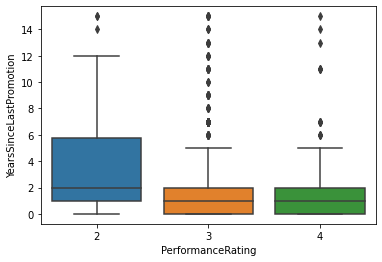

In [32]:
sns.boxplot(x='PerformanceRating',y='YearsSinceLastPromotion',data=data)
print('Mean Years since last promotion for employees with a Performance Score of 2:',data_goodper['YearsSinceLastPromotion'].mean())
print('Mean Years since last promotion for employees with a Performance Score of 3:',data_excellper['YearsSinceLastPromotion'].mean())
print('Mean Years since last promotion for employees with a Performance Score of 4:',data_outstanper['YearsSinceLastPromotion'].mean())

Ovservation: Promoting an employee every 2 years seems to boost employee performance

### Investigating the relationship between employee experience in current role and performance

Mean of Experience in current role with a Performance Score of 2: 5.788659793814433
Mean of Experience in current role with a Performance Score of 3: 4.006864988558353
Mean of Experience in current role with a Performance Score of 4: 3.977272727272727


<Figure size 1200x1200 with 0 Axes>

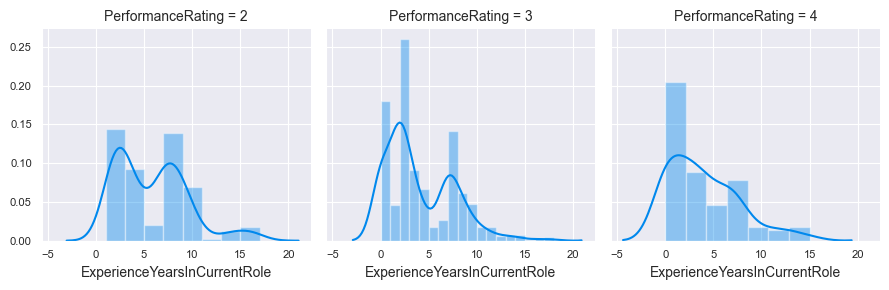

In [544]:
plt.figure(figsize=(12,12))

sns.set_style("darkgrid")

g=sns.FacetGrid(data,col="PerformanceRating")
g.map(sns.distplot,"ExperienceYearsInCurrentRole")

print('Mean of Experience in current role with a Performance Score of 2:',data_goodper['ExperienceYearsInCurrentRole'].mean())
print('Mean of Experience in current role with a Performance Score of 3:',data_excellper['ExperienceYearsInCurrentRole'].mean())
print('Mean of Experience in current role with a Performance Score of 4:',data_outstanper['ExperienceYearsInCurrentRole'].mean())


Observation:It is observed that candidates with over 5 years of experience in their current roles underperformed when compared to candidates with less than 5 years of experience

# Splitting the data 

In [357]:
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
pca = PCA(n_components=5)

In [358]:

X = df.iloc[:,[16,23,21,22,9,24,4,18,5,7]] #taking the top 10 features that have the most impact on the target variable
y = df.iloc[:,26]

In [560]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=101)

In [561]:
#Standardizing the input variables as the units vary from feature to feature
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)
x_train.shape
#pca.fit(x_train)
#pca.fit(x_test)

PCA(n_components=5)

In [562]:
#x1_train = pca.transform(x_train)
#x1_test = pca.transform(x_test)

# Models


As the target variable is to predict employee performance which falls under discrete data type. Based on this non-linearly seperable  data, it was observed that Random Forest with GridSearchCV gives the maximum accuracy of 93.8% which was used to develop the model.
In the sections below, classification alogrithms were chosen to train the model, and specifically classification alogrithms which are able to classify non-linearly seperable data such as - Random Forest,Support Vector Machines, XGBoost Classifier and Artificial Neural Networks were used in order to develop a model that was  able to predict employee performance based on the input variables, it was observed that Random Forest with GridSearchCV gives the maximum accuracy of 93.8%. Therefore Random Forest with GridSearchCV can be chosen to fit the bussiness case.

Note: PCA was also used in training the model which led to lower accuracy than the factors chosen by feature selection techniques and hence was not implemented in the model.


# 1. Random Forest Classifier

In [584]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model1 = RandomForestClassifier()

In [585]:
#Training the model
model.fit(x_train,y_train)
#Training the model with PCA components
#model1.fit(x1_train,y_train)

RandomForestClassifier()

In [586]:
#Predicting the model
predictions =model.predict(x_test)
#predictions_pca = model1.predict(x1_test)

In [587]:
#Finding accuracy, classification report
print(classification_report(y_test,predictions))
print('\n')
print(accuracy_score(y_test,predictions))

              precision    recall  f1-score   support

           2       0.88      0.85      0.86        52
           3       0.95      0.97      0.96       276
           4       0.93      0.78      0.85        32

    accuracy                           0.94       360
   macro avg       0.92      0.87      0.89       360
weighted avg       0.94      0.94      0.94       360



0.9388888888888889


In [572]:
#Finding accuracy, classification report with PCA
#print(classification_report(y_test,predictions_pca))
#print('\n')
#print(accuracy_score(y_test,predictions_pca))

Using PCA it is observed that the model accuracy  was reduced  by ~10%,therefore the original set of factors that were derived by feature selection techniques were chosen.

# Tuning Hyper Parameters using GridSearch

In [588]:
from sklearn.model_selection import GridSearchCV

In [589]:
#finding Best parameters using grid search
param_grid={'n_estimators':[100,200,300,400],'criterion' :["gini"]}
grid = GridSearchCV(RandomForestClassifier(),param_grid,verbose=3)


In [591]:
#Training the model
grid.fit(x_train,y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV 1/5] END ..criterion=gini, n_estimators=100;, score=0.940 total time=   0.6s
[CV 2/5] END ..criterion=gini, n_estimators=100;, score=0.929 total time=   0.3s
[CV 3/5] END ..criterion=gini, n_estimators=100;, score=0.946 total time=   0.3s
[CV 4/5] END ..criterion=gini, n_estimators=100;, score=0.911 total time=   0.3s
[CV 5/5] END ..criterion=gini, n_estimators=100;, score=0.917 total time=   0.3s
[CV 1/5] END ..criterion=gini, n_estimators=200;, score=0.940 total time=   0.7s
[CV 2/5] END ..criterion=gini, n_estimators=200;, score=0.929 total time=   0.8s
[CV 3/5] END ..criterion=gini, n_estimators=200;, score=0.940 total time=   0.7s
[CV 4/5] END ..criterion=gini, n_estimators=200;, score=0.905 total time=   0.7s
[CV 5/5] END ..criterion=gini, n_estimators=200;, score=0.929 total time=   0.7s
[CV 1/5] END ..criterion=gini, n_estimators=300;, score=0.946 total time=   1.1s
[CV 2/5] END ..criterion=gini, n_estimators=300;,

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini'],
                         'n_estimators': [100, 200, 300, 400]},
             verbose=3)

In [596]:
grid.best_params_

{'criterion': 'gini', 'n_estimators': 300}

In [597]:
#predicting the model
predictions = grid.predict(x_test)

In [598]:
print(classification_report(y_test,predictions))
print('\n')
print('Accuracy Score',accuracy_score(y_test,predictions))

              precision    recall  f1-score   support

           2       0.88      0.85      0.86        52
           3       0.95      0.97      0.96       276
           4       0.93      0.78      0.85        32

    accuracy                           0.94       360
   macro avg       0.92      0.87      0.89       360
weighted avg       0.94      0.94      0.94       360



Accuracy Score 0.9388888888888889


# 2. Support Vector Machines

In [325]:
# Training the model
from sklearn.svm import SVC
rbf_svc = SVC(kernel='rbf', C=10,gamma=0.1).fit(x_train,y_train)

In [326]:
# Predicting the model
predictions_svm = rbf_svc.predict(x_test)

In [327]:
# Finding accuracy, precision, recall and confusion matrix
print(classification_report(y_test,predictions_svm))
print('\n')
print('Accuracy Score',accuracy_score(y_test,predictions_svm))

              precision    recall  f1-score   support

           2       0.77      0.79      0.78        42
           3       0.90      0.94      0.92       221
           4       0.89      0.65      0.75        37

    accuracy                           0.88       300
   macro avg       0.85      0.79      0.82       300
weighted avg       0.88      0.88      0.88       300



Accuracy Score 0.8833333333333333


Accuracy score improved by 5% after Grid Search

# Support Vector Machines with GridSearch CV

In [319]:
param_grid_svm={'kernel':['rbf'],'C':[0.1,1,10],'gamma':[0.0001,0.001,0.01,0.1,1]}
grid_svm = GridSearchCV(SVC(),param_grid,verbose=3)

In [320]:
grid_svm.fit(x_train,y_train)

Fitting 5 folds for each of 15 candidates, totalling 75 fits
[CV 1/5] END ...C=0.1, gamma=0.0001, kernel=rbf;, score=0.728 total time=   0.0s
[CV 2/5] END ...C=0.1, gamma=0.0001, kernel=rbf;, score=0.728 total time=   0.0s
[CV 3/5] END ...C=0.1, gamma=0.0001, kernel=rbf;, score=0.728 total time=   0.0s
[CV 4/5] END ...C=0.1, gamma=0.0001, kernel=rbf;, score=0.722 total time=   0.0s
[CV 5/5] END ...C=0.1, gamma=0.0001, kernel=rbf;, score=0.722 total time=   0.0s
[CV 1/5] END ....C=0.1, gamma=0.001, kernel=rbf;, score=0.728 total time=   0.0s
[CV 2/5] END ....C=0.1, gamma=0.001, kernel=rbf;, score=0.728 total time=   0.0s
[CV 3/5] END ....C=0.1, gamma=0.001, kernel=rbf;, score=0.728 total time=   0.0s
[CV 4/5] END ....C=0.1, gamma=0.001, kernel=rbf;, score=0.722 total time=   0.0s
[CV 5/5] END ....C=0.1, gamma=0.001, kernel=rbf;, score=0.722 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.728 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf;

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10],
                         'gamma': [0.0001, 0.001, 0.01, 0.1, 1],
                         'kernel': ['rbf']},
             verbose=3)

In [324]:
grid_svm.best_params_

{'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}

# 3. XGBOOST

In [602]:
# Training the model
from xgboost import XGBClassifier 
model_xgb = XGBClassifier()
model_xgb.fit(x_train,y_train)

[21:17:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [603]:
# Predicting the model
predictions_xgb = model_xgb.predict(x_test)

In [604]:
# Finding accuracy, precision, recall and confusion matrix

print(classification_report(y_test,predictions_xgb))
print(accuracy_score(y_test,predictions_xgb))

              precision    recall  f1-score   support

           2       0.85      0.85      0.85        52
           3       0.95      0.96      0.96       276
           4       0.89      0.78      0.83        32

    accuracy                           0.93       360
   macro avg       0.90      0.86      0.88       360
weighted avg       0.93      0.93      0.93       360

0.9305555555555556


# Tuning Hyper Parameters with RandomizedSearchCV

In [605]:
from sklearn.model_selection import RandomizedSearchCV

In [606]:
params={
 "learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
 "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_child_weight" : [ 1, 3, 5, 7 ],
 "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]
    
}

In [607]:
random_search=RandomizedSearchCV(model_xgb,param_distributions=params,n_iter=5,scoring='roc_auc',n_jobs=-1,cv=5,verbose=3)

In [608]:
random_search.fit(x_train,y_train)


Fitting 5 folds for each of 5 candidates, totalling 25 fits
[21:17:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                           colsample_bylevel=1,
                                           colsample_bynode=1,
                                           colsample_bytree=1, gamma=0,
                                           gpu_id=-1, importance_type='gain',
                                           interaction_constraints='',
                                           learning_rate=0.300000012,
                                           max_delta_step=0, max_depth=6,
                                           min_child_weight=1, missing=nan,
                                           monotone_constraints='()',
                                           n_estimators=100, n_jobs=4,
                                           num_pa...
                                           random_state=0, reg_alpha=0,
                                           reg_lambda=1, scale_p

In [609]:
random_search.best_params_

{'min_child_weight': 1,
 'max_depth': 8,
 'learning_rate': 0.15,
 'gamma': 0.3,
 'colsample_bytree': 0.3}

In [610]:
#Applying these parameters to the model
model_xgb_rs = XGBClassifier(min_child_weight= 1,max_depth=8,learning_rate = 0.15,gamma=0.3,colsample_bytree=0.3)

In [611]:
model_xgb_rs.fit(x_train,y_train)

[21:18:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.3, gamma=0.3, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.15, max_delta_step=0, max_depth=8,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [612]:
# Predicting the model
predictions_xgb_rs = model_xgb_rs.predict(x_test)

In [613]:
# Finding accuracy, precision, recall and confusion matrix

print(classification_report(y_test,predictions_xgb_rs))
print(accuracy_score(y_test,predictions_xgb_rs))

              precision    recall  f1-score   support

           2       0.86      0.81      0.83        52
           3       0.93      0.97      0.95       276
           4       0.88      0.69      0.77        32

    accuracy                           0.92       360
   macro avg       0.89      0.82      0.85       360
weighted avg       0.92      0.92      0.92       360

0.9194444444444444


In [614]:
confusion_matrix(y_test,predictions_xgb_rs)

array([[ 42,  10,   0],
       [  6, 267,   3],
       [  1,   9,  22]], dtype=int64)

# 4. Artificial Neural Network

In [615]:
# Training the model
from sklearn.neural_network import MLPClassifier
model_mlp = MLPClassifier(hidden_layer_sizes=(100,100,100),batch_size=10,learning_rate_init=0.01,max_iter=2000,random_state=10)
model_mlp.fit(x_train,y_train)

MLPClassifier(batch_size=10, hidden_layer_sizes=(100, 100, 100),
              learning_rate_init=0.01, max_iter=2000, random_state=10)

In [616]:
# Predicting the model
predictions_mlp = model_mlp.predict(x_test)

In [617]:
print(classification_report(y_test,predictions_mlp))
print('\n')
print('Accuracy Score:', accuracy_score(y_test,predictions_mlp))

              precision    recall  f1-score   support

           2       0.68      0.75      0.72        52
           3       0.91      0.90      0.91       276
           4       0.67      0.62      0.65        32

    accuracy                           0.86       360
   macro avg       0.75      0.76      0.76       360
weighted avg       0.86      0.86      0.86       360



Accuracy Score: 0.8555555555555555


# PROJECT SUMMARY

Classification alogrithms were chosen to train the model, as the target variable falls under discrete data type and specifically classification alogrithms which are able to classify non-linearly seperable data such as - Random Forest,Support Vector Machines, Naive Bayes, XGBoost Classifier and Artificial Neural Networks were used in order to develop a model that was  able to predict employee performance based on the input variables, it was observed that Random Forest with GridSearchCV gives the maximum accuracy of 94%. Therefore Random Forest with GridSearchCV can be chosen to fit the bussiness case.


The most important features for analysis was selected using the following feature selection techniques:

 - Univarite Analysis
 - Feature Analysis using ExtraTreesClassifier
 - Correlation Score

Based on the above, the following features were selected for Analysis:
 - Emp Last Salary Hike Perecent
 - Emp Environment Satisfaction
 - Years Since Last Promotion
 - Emp Department
 - Experience Years in Current Role
 - Emp Work Life Balance
 - Emp Job Role
 - Years with Current Manager
 - Experience Years at this Company
 - Emp Hourly Rate
 
It was observed that using these features for training the model yielded a fair accuracy score.

PCA factorization was also used to select the features but as the accuracy was comparitvely lower than the above feature selection techniques. Therefore, PCA was not implemented into training the model.



Univariate Analysis was used to identify the linearly of data.

It was concluded that as the points were not linearly seperable , Logistic Regression could be ruled out for training the model

## FEATURE SELECTION /ENGINEERING

The most important features for analysis was selected using the following feature selection techniques:

   - Univarite Analysis
   - Feature Analysis using ExtraTreesClassifier
   - Correlation Score

Based on the above, the following features were selected for Analysis:

   - Emp Last Salary Hike Perecent
   - Emp Environment Satisfaction
   - Years Since Last Promotion
   - Emp Department
   - Experience Years in Current Role
   - Emp Work Life Balance
   - Emp Job Role
   - Years with Current Manager
   - Experience Years at this Company
   - Emp Hourly Rate


Feature Tranformations

Standard scaler was used to transform the features so as to control the difference of magnitude within the units of the selected features

## 1. Department wise performances 

<AxesSubplot:xlabel='EmpDepartment', ylabel='PerformanceRating'>

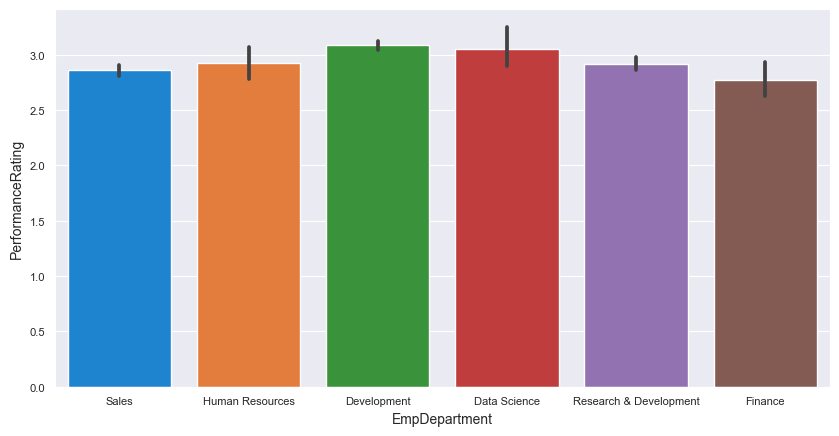

In [578]:
df.groupby(by='EmpDepartment')['PerformanceRating'].mean()
fig = plt.figure(figsize=(10,5))
sns.barplot(x='EmpDepartment',y='PerformanceRating',data=data)

<Figure size 2000x2000 with 0 Axes>

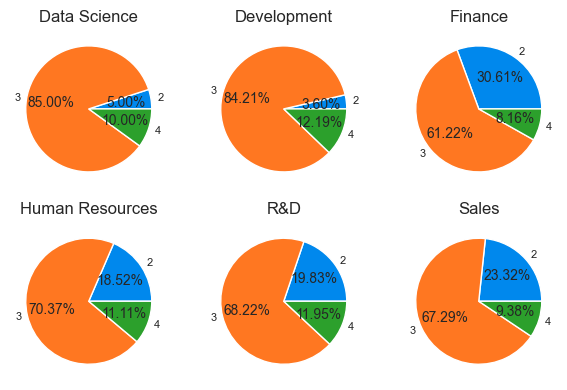

In [579]:
fig = plt.figure(figsize=(20,20))
fig,ax = plt.subplots(2,3)
ax[0,0].pie(dataset_table['Data Science'],autopct='%1.2f%%',labels=[2,3,4])
ax[0,0].set_title('Data Science')

ax[0,1].pie(dataset_table['Development'],autopct='%1.2f%%',labels=[2,3,4])
ax[0,1].set_title('Development')

ax[0,2].pie(dataset_table['Finance'],autopct='%1.2f%%',labels=[2,3,4])
ax[0,2].set_title('Finance')

ax[1,0].pie(dataset_table['Human Resources'],autopct='%1.2f%%',labels=[2,3,4])
ax[1,0].set_title('Human Resources')

ax[1,1].pie(dataset_table['Research & Development'],autopct='%1.2f%%',labels=[2,3,4])
ax[1,1].set_title('R&D')

ax[1,2].pie(dataset_table['Sales'],autopct='%1.2f%%',labels=[2,3,4])
ax[1,2].set_title('Sales')


plt.tight_layout()
plt.show()

Insights:
    We can infer from Exploratory Data Analysis Section that, the top 3 factors effecting employee performance are:
   
   - Emp Last Salary Hike Perecent
   - Emp Environment Satisfaction
   - Years Since Last Promotion<br>
 The top 3 factors and the following factors were chosen to train the model
   - Emp Department
   - Experience Years in Current Role
   - Emp Work Life Balance
   - Emp Job Role
   - Years with Current Manager
   - Experience Years at this Company
   - Emp Hourly Rate

Recommendations:
 - For employees currently working with the company, looking at the data and we can infer that creating a work environment   based around the necessities of the employee correlates to a better performing employee, it is observed from the data that, employees that recieve a high salary hike tend to outperform employees that recieve a low salary hike, promoting employee retreats and such also tend to improve an employees performance,as work life balance is also a key parameter contributing to employee perfromance.
Additional Insights: Employees working in the Development department have shown the best performance according to the given data, which suggests that their input and suggestions can also be taken and implemented in other departments.
 
  